In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

def parse_date(col):
    return pd.to_datetime(
        col
        .str.replace(r"(\d+)(st|nd|rd|th)", r"\1", regex=True),
        errors="coerce"
    )

Matplotlib is building the font cache; this may take a moment.


In [2]:
data_set = pd.read_csv('gpu_1986-2026.csv')
df = data_set.copy()
df.head(5).T

,0,1,2,3,4
Brand,ATI,ATI,ATI,ATI,ATI
Name,Color Emulation Card,Graphics Solution,EGA Wonder 800,Graphics Solution Plus,VGA Improved Performance
Top__GRAPHICS PROCESSOR,CW16800-A,CW16800-A,16899-0,CW16800-B,16899-0
Top__PIXEL SHADERS,NaN,NaN,1,NaN,1
Top__VERTEX SHADERS,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
Theoretical Performance__TF32,NaN,NaN,NaN,NaN,NaN
Theoretical Performance__FP64 Tensor,NaN,NaN,NaN,NaN,NaN
Graphics Features__NVENC,NaN,NaN,NaN,NaN,NaN
Graphics Features__NVDEC,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()
df.shape

<class 'pandas.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Columns: 134 entries, Brand to Mobile Graphics__Announced
dtypes: float64(16), int64(2), str(116)
memory usage: 3.3 MB


(3203, 134)

In [4]:
year_cols = [
    c for c in df.columns
    if re.search(r"year|date|launch|release|announced", c, re.IGNORECASE)
]

df[year_cols].head().T

,0,1,2,3,4
Graphics Card__Release Date,"Aug 4th, 1986","Sep 22nd, 1986","Nov 16th, 1987","Mar 23rd, 1987","Sep 28th, 1987"
Graphics Card__Launch Price,NaN,NaN,NaN,NaN,449 USD
Mobile Graphics__Release Date,NaN,NaN,NaN,NaN,NaN
Integrated Graphics__Release Date,NaN,NaN,NaN,NaN,NaN
Integrated Graphics__Launch Price,NaN,NaN,NaN,NaN,NaN
Graphics Card__Announced,NaN,NaN,NaN,NaN,NaN
Integrated Graphics__Announced,NaN,NaN,NaN,NaN,NaN
Mobile Graphics__Launch Price,NaN,NaN,NaN,NaN,NaN
Mobile Graphics__Announced,NaN,NaN,NaN,NaN,NaN


In [5]:
df[year_cols].isna().mean().sort_values(ascending=False)

Integrated Graphics__Launch Price    0.998439
Mobile Graphics__Announced           0.998439
Integrated Graphics__Announced       0.996254
Mobile Graphics__Launch Price        0.995941
Graphics Card__Announced             0.982204
Integrated Graphics__Release Date    0.853263
Graphics Card__Launch Price          0.796129
Mobile Graphics__Release Date        0.691539
Graphics Card__Release Date          0.455198
dtype: float64

In [6]:
df["Graphics Card__Release Date"].describe()

count              1745
unique              861
top       Sep 1st, 2004
freq                 20
Name: Graphics Card__Release Date, dtype: object

In [7]:
parsed_date = parse_date(df["Graphics Card__Release Date"])

date_df = pd.DataFrame(parsed_date)
date_df.head()

,Graphics Card__Release Date
0,1986-08-04
1,1986-09-22
2,1987-11-16
3,1987-03-23
4,1987-09-28


In [8]:
name_cols = [
    c for c in df.columns
    if re.search(r"name|model|product", c, re.IGNORECASE)
]

df[name_cols].head().T

,0,1,2,3,4
Name,Color Emulation Card,Graphics Solution,EGA Wonder 800,Graphics Solution Plus,VGA Improved Performance
Graphics Processor__GPU Name,CW16800-A,CW16800-A,16899-0 | CHIPS P82C435,CW16800-B,16899-0 | CHIPS P82C441
Graphics Card__Production,End-of-life,End-of-life,End-of-life,End-of-life,End-of-life
Mobile Graphics__Production,NaN,NaN,NaN,NaN,NaN
Integrated Graphics__Production,NaN,NaN,NaN,NaN,NaN
Graphics Features__Shader Model,NaN,NaN,NaN,NaN,NaN
Graphics Processor__Codename,NaN,NaN,NaN,NaN,NaN


In [9]:
df[name_cols].isna().mean().sort_values(ascending=False)

Graphics Processor__Codename       0.991570
Integrated Graphics__Production    0.853263
Mobile Graphics__Production        0.691539
Graphics Card__Production          0.455198
Graphics Features__Shader Model    0.191071
Name                               0.000000
Graphics Processor__GPU Name       0.000000
dtype: float64

In [10]:
vendor_cols = [
    c for c in df.columns
    if re.search(r"manufacturer|vendor|brand|company", c, re.IGNORECASE)
]

df[vendor_cols].head().T

,0,1,2,3,4
Brand,ATI,ATI,ATI,ATI,ATI


In [11]:
df[vendor_cols].isna().mean().sort_values(ascending=False)

Brand    0.0
dtype: float64

In [12]:
price_cols = [
    c for c in df.columns
    if re.search(r"price|msrp|cost|usd|\$", c, re.IGNORECASE)
]

df[price_cols].isna().mean().sort_values(ascending=False)

Integrated Graphics__Launch Price    0.998439
Mobile Graphics__Launch Price        0.995941
Graphics Card__Current Price         0.982516
Graphics Card__Launch Price          0.796129
dtype: float64

In [13]:
low_nan_cols = df.columns[df.isna().mean() < 0.4]

df[low_nan_cols].isna().mean().sort_values(ascending=False)

Graphics Processor__Chip Package         0.399625
Clock Speeds__GPU Clock                  0.393693
Render Config__L2 Cache                  0.375585
Graphics Processor__GPU Variant          0.322822
Graphics Features__OpenCL                0.303778
Top__CORES                               0.261005
Theoretical Performance__FP32 (float)    0.261005
Render Config__Shading Units             0.261005
Graphics Features__Shader Model          0.191071
Board Design__Slot Width                 0.116141
Graphics Processor__Density              0.091789
Recommended Resolutions                  0.073993
Graphics Features__OpenGL                0.041211
Graphics Processor__Foundry              0.038714
Graphics Features__DirectX               0.033094
Top__TMUS                                0.009054
Graphics Processor__Architecture         0.007805
Top__ROPS                                0.007805
Board Design__Outputs                    0.002185
Board Design__TDP                        0.002185


In [14]:
core_df = df[
    df["Graphics Card__Release Date"].notna() &
    df["Brand"].notna() &
    df["Name"].notna()
].copy()

core_df.shape

(1745, 134)

In [15]:
date_df["release_year"] = date_df["Graphics Card__Release Date"].dt.year

core_df = core_df.join(date_df["release_year"])

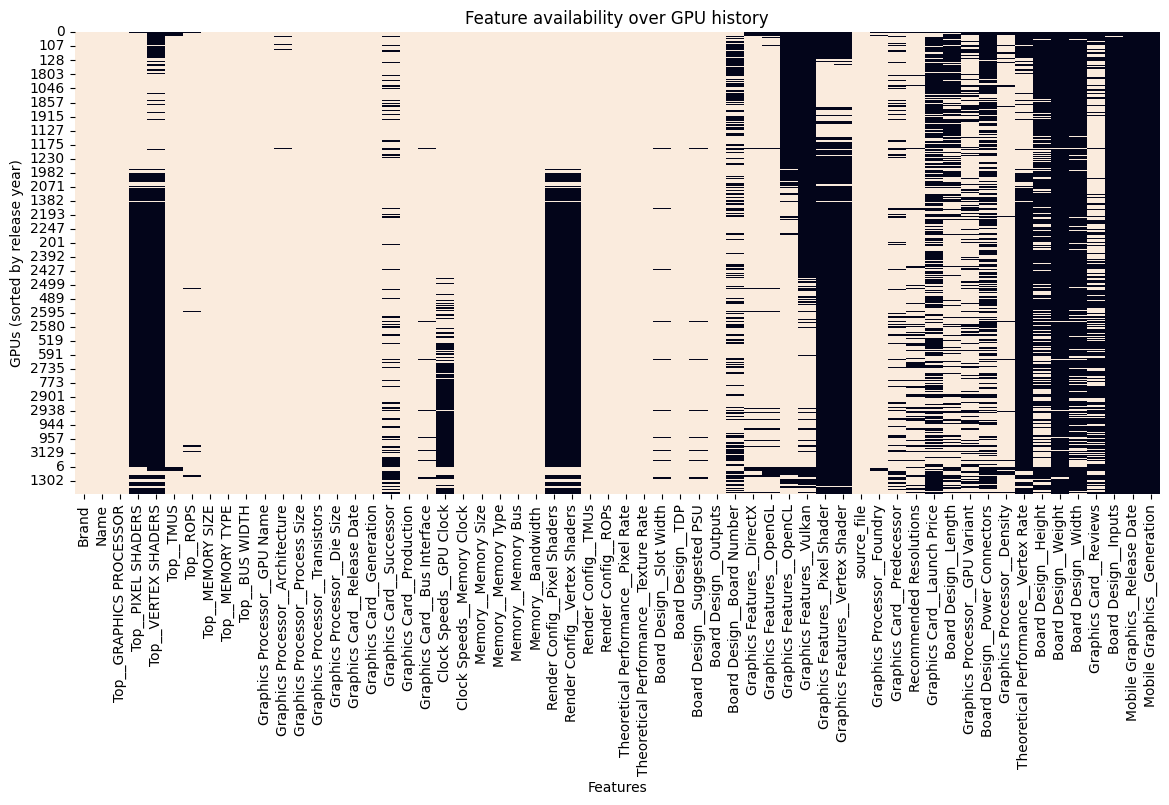

In [16]:
sorted_df = core_df.sort_values("release_year")

plt.figure(figsize=(14, 6))
sns.heatmap(
    sorted_df.iloc[:, :60].notna(),
    cbar=False
)
plt.title("Feature availability over GPU history")
plt.xlabel("Features")
plt.ylabel("GPUs (sorted by release year)")
plt.show()

In [17]:
core_df["Brand_norm"] = (
    core_df["Brand"]
    .str.upper()
    .replace({
        "ATI": "AMD",
        "ADVANCED MICRO DEVICES": "AMD",
        "NVIDIA CORPORATION": "NVIDIA",
        "INTEL CORPORATION": "INTEL"
    })
)

core_df["Brand_norm"].value_counts().head(10)

Brand_norm
NVIDIA    837
AMD       781
INTEL      35
MATROX     35
3DFX       16
XGI        15
SIS        11
SONY        9
S3          6
Name: count, dtype: int64

In [20]:
core_df.groupby("Brand_norm")["release_year"].count()

Brand_norm
3DFX       14
AMD       730
INTEL      30
MATROX     21
NVIDIA    810
S3          6
SIS         8
SONY        9
XGI        15
Name: release_year, dtype: int64

In [21]:
vendor_year_counts = core_df.groupby(["Brand_norm", "release_year"])["Name"].count().reset_index(name="gpu_count")
vendor_year_counts.head()

,Brand_norm,release_year,gpu_count
0,3DFX,1996.0,1
1,3DFX,1998.0,4
2,3DFX,1999.0,5
3,3DFX,2000.0,4
4,AMD,1986.0,2


In [22]:
dominant_brand_per_year = vendor_year_counts.loc[
    vendor_year_counts.groupby("release_year")["gpu_count"].idxmax()
].sort_values("release_year").reset_index(drop=True)

dominant_brand_per_year = dominant_brand_per_year[["release_year", "Brand_norm", "gpu_count"]]
dominant_brand_per_year.head(10)

,release_year,Brand_norm,gpu_count
0,1986.0,AMD,2
1,1987.0,AMD,3
2,1988.0,AMD,1
3,1990.0,AMD,2
4,1992.0,AMD,1
5,1994.0,SONY,1
6,1995.0,AMD,4
7,1996.0,AMD,6
8,1997.0,AMD,9
9,1998.0,AMD,6


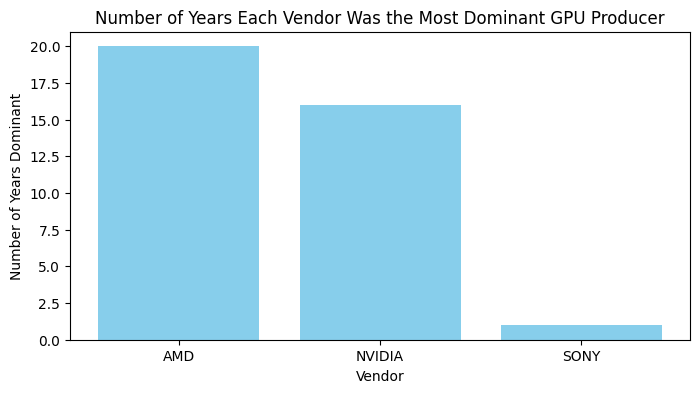

In [26]:
vendor_counts = dominant_brand_per_year["Brand_norm"].value_counts()

plt.figure(figsize=(8, 4))
plt.bar(vendor_counts.index, vendor_counts.values, color='skyblue')

plt.xlabel("Vendor")
plt.ylabel("Number of Years Dominant")
plt.title("Number of Years Each Vendor Was the Most Dominant GPU Producer")

plt.show()

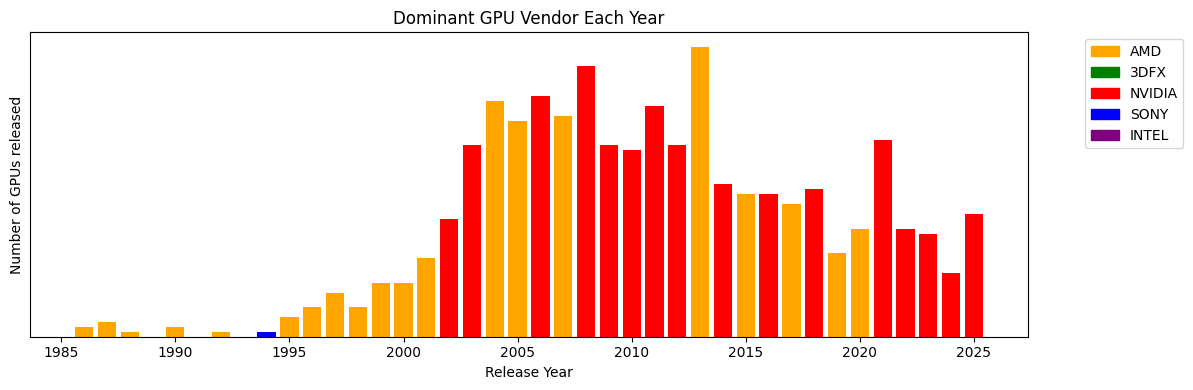

In [30]:
plt.figure(figsize=(12, 4))

colors = {
    'AMD': 'orange',
    '3DFX': 'green',
    'NVIDIA': 'red',
    'SONY': 'blue',
    'INTEL': 'purple'
}

plt.bar(
    dominant_brand_per_year["release_year"],
    dominant_brand_per_year["gpu_count"],
    color=dominant_brand_per_year["Brand_norm"].map(colors),
    width=0.8
)

plt.yticks([])

plt.xlabel("Release Year")
plt.ylabel("Number of GPUs released")
plt.title("Dominant GPU Vendor Each Year")

handles = [plt.Rectangle((0,0),1,1,color=c) for c in colors.values()]
plt.legend(handles, colors.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()